In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

warnings.filterwarnings('ignore')

In [3]:
# 用來印出數字的function
def printNUM(num, word):
    if num < 10:
        print('[00' + str(num) + ']', word)
    elif num < 100:
        print('[0' + str(num) + ']', word)
    else:
        print('[' + str(num) + ']', word)

In [4]:
url = 'https://www.cupoy.com/newsfeed/topicgrp/tech_tw'
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get(url)
time.sleep(5)

count = 1
titlelist = []
contentlist = []
sourcelist = []
while (count <= 500) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、文章內容、文章來源抓下來
        title = artical.find('h6').text
        content = artical.find('p').text
        source = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        
        # 防止爬到重複的文章
        if title not in titlelist:
            printNUM(count, title)
            count += 1
            # 將各資料存進list以供後續分析
            titlelist.append(title)
            contentlist.append(content)
            sourcelist.append(source)
            
        # 停止條件，抓到500篇文章即終止程式
        if count == 501:
            break
    
    # 繼續往下滑
    time.sleep(0.7)
    browser.execute_script("window.scrollTo(0, 1000000);")

[001] iOS 玩家終於可以體驗到微軟帶來的 Project xCloud 預覽版了
[002] Android 成功減少 98% 的 app 存取電話和文字訊息
[003] Sony 終於讓第三方開發者為其相機設計遙控器
[004] 打擊不當應用程式和惡意開發人員 Google Play 攔截 App 破 79 萬款 - INSIDE
[005] NASA 準備新聘太空人重返月球、登陸火星，來看看資格你符不符？ - INSIDE
[006] Firefox 73出爐了，改善網頁閱讀經驗，修補6個安全漏洞 | iThome
[007] LINE 臺灣大徵才！12 團隊募集資料、資安、前後端、測試、行動開發人才 - INSIDE
[008] 中國發表可查詢是否曾與武漢肺炎確診者密切接觸的雲端服務 | iThome
[009] 1.65 億買下洛杉磯最貴豪宅！貝佐斯花了萬分之十三身家 - INSIDE
[010] 報名 | 萬衆「疫」心，疫情數據可視化公益行動啓動 | 機器之心
[011] Rasa 聊天機器人專欄（下） | 機器之心
[012] 停課不停學 | 曠視×北大《深度學習實踐》課程全面開放！ | 機器之心
[013] R語言中K鄰近算法的初學者指南：從菜鳥到大神（附代碼＆鏈接） | 機器之心
[014] 因氣候不佳，臺灣自製火箭「飛鼠一號」發射喊停 2 個月內再射 - INSIDE
[015] 區塊鏈能做什麼？有風險嗎？3 個管理問題，你不能忽視 | 經理人
[016] 新機難產...Android 之父 Andy Rubin 的手機新創 Essential 宣佈倒閉 - INSIDE
[017] 快訊！GSMA 正式宣佈：停辦今年 MWC 大會 - INSIDE
[018] 微軟、臺積電破天荒辦黑客鬆競賽！前進校園網羅人才，看中2點特質｜數位時代
[019] 兩大廠青睞！ITM國際信任機器拿下高通創新競賽亞軍後，再獲聯發科Pre-A輪投資｜數位時代
[020] 比特幣重返1萬美元，虛擬貨幣跟N世代有關嗎？-風傳媒
[021] AI 的透明化面臨著一個詭局
[022] Direct Message for Instagram 在電腦上使用 IG 傳訊接收訊息功能
[023] 振興抵用券怎麼用？懶人包一次看，觀光、運輸業補貼也將上路｜數位時代
[024] 

[173] 技嘉創作者筆電選購指南！AERO 搭 NVIDIA RTX 贈 Adobe大禮 | T客邦
[174] 時間紀錄 App 『 TimeTrack 』更瞭解自己的作息 有效運用每分鐘！Android / iOS - 電獺少女：女孩的科技日常-App、科技酷品、生活與美食
[175] 《樹木希林 一切隨心》：其實癌症這種病啊，很珍貴哦！ - The News Lens 關鍵評論網
[176] 【插畫】傷人的話，隔著螢幕依然傷人 - The News Lens 關鍵評論網
[177] 官方爆料！三星的奧斯卡廣告 360 度秀出即將發表的摺疊手機 Z Flip！ - 電獺少女：女孩的科技日常-App、科技酷品、生活與美食
[178] 【TO 現場直擊】IBM 世界創舉！首場 AI vs 真人辯論公開賽，電腦罩得住嗎？ | TechOrange
[179] Motorola Razr 耐用度測試：耐火卻不耐刮
[180] 如何寫出 AI 偏好的關鍵字履歷？進外商／美國求職不可不知的三個技巧 ｜ Alice Yang／哈佛姐的不正經學術之旅 ｜ 換日線 Crossing
[181] 宏佳騰再推新電動機車 Ai-1 Comfort 與 Comfort+，降低入手門檻
[182] D-Link 的家居監控鏡頭將支援由 AI 驅動的人體偵測技術
[183] LG 的 2020 年款 Soundbar 將會有 AI 調音
[184] Nokia確定退出參與MWC 2020 新機也將以其他方式公佈 (151674) - 癮科技 Cool3c
[185] KONAMI推出自有電競品牌「ARESPEAR」 包含桌機、鍵盤與耳機配件 (151678) - 癮科技 Cool3c
[186] 比 Intel 更快！Nvidia 發佈新 Ultrabook 顯示卡 MX 300 系列 - New MobileLife 流動日報
[187] 華為預告MWC 2020展前活動內容 聚焦5G與全場景應用產品 可能公佈Mate Xs海外版上市資訊 (151664) - 癮科技 Cool3c
[188] 三星Galaxy S20系列配件動眼看 布紋材質款式首度亮相 (151668) - 癮科技 Cool3c
[189] 三星Galaxy S20系列手機規格比一筆 哪裡不一樣？哪一臺是你的好選擇？ 

[332] 林坤正：網軍介入全球政治選舉——得數據者得天下 | 財訊- 掌握趨勢  投資未來 | 最懂投資的財經媒體
[333] 全球趨勢｜人工智慧讓未來工作洗牌 教孩子AI不等於學程式 是學「AI素養」/教育現場/教育趨勢/2019-12-27/親子天下雜誌110期
[334] 自拍鏡頭配合人工智能 Samsung C-Lab 研發 SelfieType 隱形鍵盤 | 香港 unwire.hk 玩生活．樂科技
[335] ．AI + 醫療，打造全流程智慧醫療 - 3S Market「全球智慧科技應用」市場資訊網
[336] 【比醫生快 10 倍】閱讀 250 萬個大腦影像後，AI 能在 3 分鐘內快速抓出腦癌！ | TechOrange
[337] LG 發表品牌對 AI 的終極想像是……像個科學家？ - SayDigi | 點子生活
[338] LG 發表品牌對 AI 的終極想像是......像個科學家？ - Saydigi-Tech | 點子科技
[339] CES 2020：LG劃分居家人工智慧應用為4個等級 以家庭為中心向外擴展更多應用 (150965) - 癮科技 Cool3c
[340] 美國限制 AI 產品出口中國！禁止與中國領先的監控公司進行交易 | TechOrange
[341] 美國限制 AI 人工智能軟件出口 勢打壓中國監控產品 | 香港 unwire.hk 玩生活．樂科技
[342] 為什麼貓咪機器人和聯發科神祕晶片，同時成為2020年CES展熱門看點？ - 商周頭條 - 國際 - 商業週刊｜商周
[343] 中文課程-機器學習 A-Z 課程 - Soft & Share 線上課程資訊分享
[344] 美國將立法避免人工智慧、機器人等敏感技術落入中國等國家手裡 (150921) - 癮科技 Cool3c
[345] Samsung 人造人項目 人工智能 NEON 即將登場 | 香港 unwire.hk 玩生活．樂科技
[346] 當人工智慧遇到人資，會是 HR 的未來還是殺手呢？ ｜ MeetHub
[347] 3000臺AI攝影機落地背後，可見韓國的技術戰略決心
[348] 遏止人臉辨識，道路阻且長
[349] Google AI 分析 X 光片檢查乳癌　準確度超越醫生 - UNWIRE.PRO
[350] HPX Campus 78 

In [170]:
# 將sourcelist轉成sourceDict
sourceDict = {}
for source in sourcelist:
    if source not in sourceDict:
        sourceDict[source] = 1
    else:
        sourceDict[source] = sourceDict.get(source, 0) + 1
        
# 將sourceDict轉成DataFrame
dataDf = pd.DataFrame(list(sourceDict.items()))
dataDfSort = dataDf.sort_values(1,ascending= False)
dataDfSort

,0,1
6,AI與大數據,180
3,Fintech金融科技,81
11,手機平板,38
7,區塊鏈技術,31
15,3C產品,21
4,資訊安全,19
1,APP應用程式,15
5,社交媒體,13
9,Google專區,13
13,蘋果專區,13


數量最多的新聞種類 : AI與大數據 , 數量 : 180
數量最少的新聞種類 : 影劇 , 數量 : 1
數量最少的新聞種類 : 美妝保養 , 數量 : 1


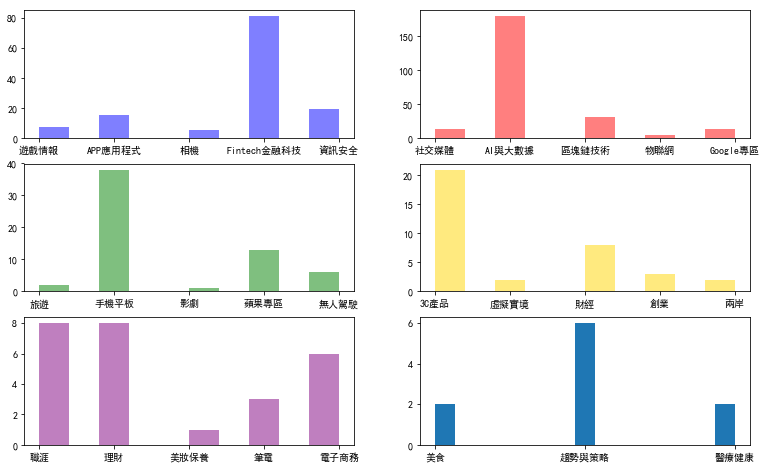

In [183]:
# 解決中文顯示問題
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 印出相關資訊
print('數量最多的新聞種類 :', dataDfSort[0][6], ', 數量 :', dataDfSort[1][6])
print('數量最少的新聞種類 :', dataDfSort[0][12], ', 數量 :', dataDfSort[1][12])
print('數量最少的新聞種類 :', dataDfSort[0][22], ', 數量 :', dataDfSort[1][22])

# 繪圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple']
plotlist = []
plt.figure(figsize = (13,8))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % 5 == 0:
        plt.subplot(3,2,count/5)
        plt.hist(plotlist, alpha=0.5, color=color[int(count/5-1)])
        plotlist = []
    count += 1
plt.subplot(3,2,6)
plt.hist(plotlist, bins=15)
plt.show()

(-1.1165586305428914,
 1.1007885066271832,
 -1.1032156875822063,
 1.1008702238359722)

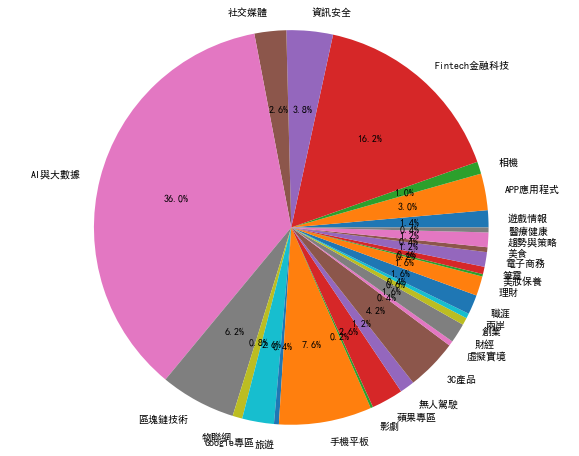

In [203]:
plt.figure(figsize=(10,8))    # 顯示圖框架大小

labels = dataDf[0]      # 製作圓餅圖的類別標籤
size = dataDf[1]        # 製作圓餅圖的數值來源

plt.pie(size, labels = labels, autopct = '%1.1f%%')
plt.axis('equal') 